# Subsection-VIB Plots

First Code Session:

In order to run the code, you will need to ensure that you have all the necessary packages installed, which are in the first code section. Once all the required packages are installed and loaded, you can import the necessary functions using the second code section.

In [1]:
using PyPlot, LinearAlgebra, JuMP, Ipopt, Statistics

In [2]:
include("SVIB_code.jl");
include("SVIB_plots.jl");

# Section 6-VIB

The cells below are the settings for plots 6, 5 and 8 of the article.

In [5]:
#Agents initial conditions
N_a =  10 #number of agents
x_init = [0.1;0.7; 0.4; 0.4; 0.8; 0.7; 0.9; 0.6; 0.9; 0.5]

#Players targets
N_p = 4
x1_hat = 0.5
x2_hat = 0.7
x3_hat = 0.2
x4_hat = 0.3

p1 = [x1_hat;0;0;0;0;0;0;0;0;0]
p2 = [0;0;0;x2_hat;0;0;0;0;0;0]
p3 = [0;0;0;0;0;x3_hat;0;0;0;0]
p4 = [0;0;0;0;0;0;0;0;x4_hat;0]

targets = [p1 p2 p3 p4]

γ = [0.01; 0.01; 0.01;0.01];

#Dynamics DeGroot model
A = 1/N_a.*ones(N_a,N_a);
B = [1 0 0 0; 0 0 0 0; 0 0 0 0; 0 1 0 0; 0 0 0 0; 0 0 1 0;  0 0 0 0; 0 0 0 0; 0 0 0 1;  0 0 0 0];

#Friedkin-Johnsen model
Θ = diagm([0.8,0.2,0.4,0,0.8,0,0.3,0.4,0.5,0])
A_FJ = (I(N_a)-Θ)*A;

#Hegselmann-Krause model
F = 90;
W = 0.3; #For Figure 7, and W = 0.4, for Figure 8

A_HK = ones(N_a,N_a)

K_f = 60; #horizon

In [7]:
x_os_dg, u_os_dg = COD_OSA_J_DeGroot(x_init,targets,γ,K_f,A,B,N_a,N_p,0);
x_os_fj, u_os_fj = COD_OSA_J_targets_FJ(x_init,targets,γ,K_f,A_FJ,B,Θ,N_a,N_p,0);
x_os_hk, u_os_hk = COD_OSA_J_targets_HK(x_init,targets,γ,K_f,A_HK,B,F,W,0);
x_os = [x_os_dg;x_os_fj;x_os_hk];

# Configurations for plots

## Figure 6
Use "T = 20"; "model = 2"

## Figure 7
Use "T = 60"; "model = 3" and set "W_1 = 0.3" in line 31 from model configuration

## Figure 8
Use "T = 20"; "model = 3" and set "W_1 = 0.4" in line 31 from model configuration

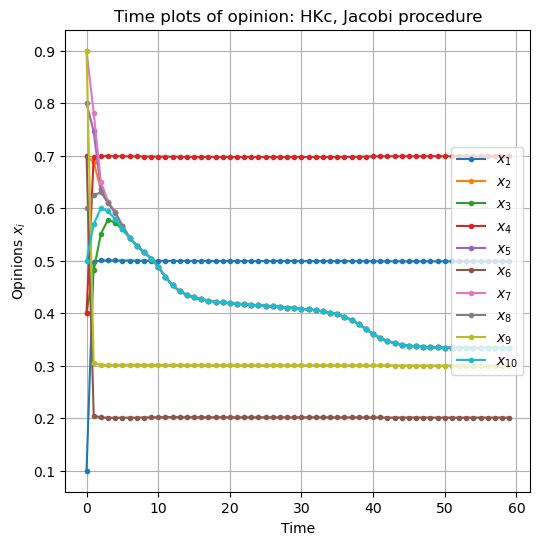

In [9]:
model = 3  # model: 1 - DeGroot; 2 - FJ; 3 - HK
T = 20;
save = 0 #If =1, Figure will be save
plot_targ_10a(x_os, T, model, save)

# Extra

In code below, it is possible to calculate the spetral radius, "s_radius", and the equilibrium, "x_eq", using equations presented in paper.

In [10]:
# Calculus for equilibrium point and spectral radius
model = 1; # 1 - DeGroot; 2 - FJ
s_radius, x_eq = equilibrium_(N_a,A,A_FJ,B,Θ,γ,targets, x_init, model);